In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [4]:
# y_train = y_train.reshape(-1,)

In [5]:
# Reshape converting 2D to 1D
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [6]:
# This code normalazation
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
from tensorflow.keras import layers, models
lenet = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'), #C1
    keras.layers.AveragePooling2D(), #S1
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'), #C2
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='relu', padding='valid'), #C3
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(84, activation='relu'), #F1
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [9]:
lenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d (Average  (None, 16, 16, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 6, 6, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 480)               0

In [11]:
# Compile the model with adjusted hyperparameters
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate
lenet.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)

In [12]:
hist = lenet.fit(datagen.flow(x_train, y_train, batch_size=32),
                 steps_per_epoch=len(x_train) / 32, epochs=100,
                 validation_data=(x_test, y_test))

Epoch 1/100
1562/1562 [==============================] - 41s 23ms/step - loss: 1.6947 - accuracy: 0.3760 - val_loss: 1.3957 - val_accuracy: 0.4894
Epoch 2/100
1562/1562 [==============================] - 35s 22ms/step - loss: 1.4370 - accuracy: 0.4787 - val_loss: 1.2589 - val_accuracy: 0.5470
Epoch 3/100
1562/1562 [==============================] - 37s 24ms/step - loss: 1.3368 - accuracy: 0.5179 - val_loss: 1.2336 - val_accuracy: 0.5596
Epoch 4/100
1562/1562 [==============================] - 40s 25ms/step - loss: 1.2796 - accuracy: 0.5400 - val_loss: 1.2001 - val_accuracy: 0.5684
Epoch 5/100
1562/1562 [==============================] - 35s 22ms/step - loss: 1.2371 - accuracy: 0.5582 - val_loss: 1.1270 - val_accuracy: 0.5948
Epoch 6/100
1562/1562 [==============================] - 47s 30ms/step - loss: 1.1926 - accuracy: 0.5742 - val_loss: 1.1238 - val_accuracy: 0.6021
Epoch 7/100
1562/1562 [==============================] - 36s 23ms/step - loss: 1.1676 - accuracy: 0.5851 - val_loss: 1

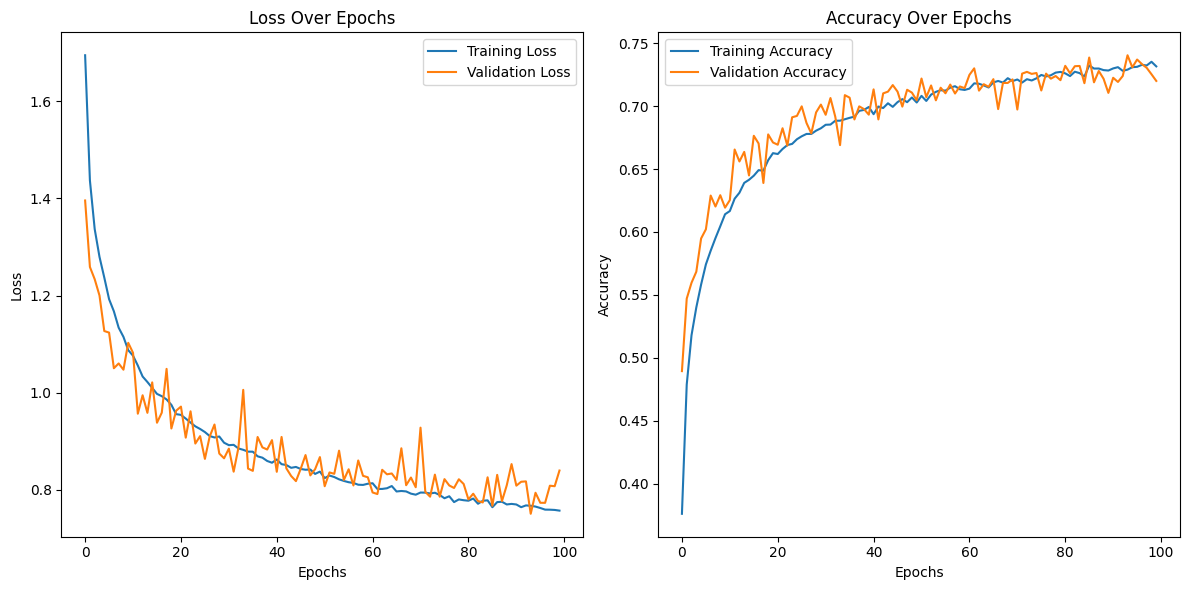

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_predictions= lenet.predict(x_test)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)

confusion_matrix(y_test, y_predictions)

313/313 [==============================] - 1s 2ms/step


array([[752,  50,  10,   9,   9,   2,   7,   9,  75,  77],
       [  3, 892,   1,   1,   0,   0,   3,   0,  12,  88],
       [ 77,  22, 553,  55,  87,  43,  65,  40,  15,  43],
       [ 32,  31,  41, 443,  83, 132,  66,  45,  30,  97],
       [ 31,   6,  44,  33, 699,  22,  53,  74,  10,  28],
       [ 18,  13,  34, 152,  67, 548,  35,  65,  15,  53],
       [ 10,  17,  18,  31,  33,  19, 813,  13,   9,  37],
       [ 24,   9,  12,  28,  44,  25,  12, 796,   1,  49],
       [ 38,  66,   2,   4,   4,   0,   1,   5, 826,  54],
       [ 16,  78,   2,   2,   1,   1,   1,   6,  15, 878]])

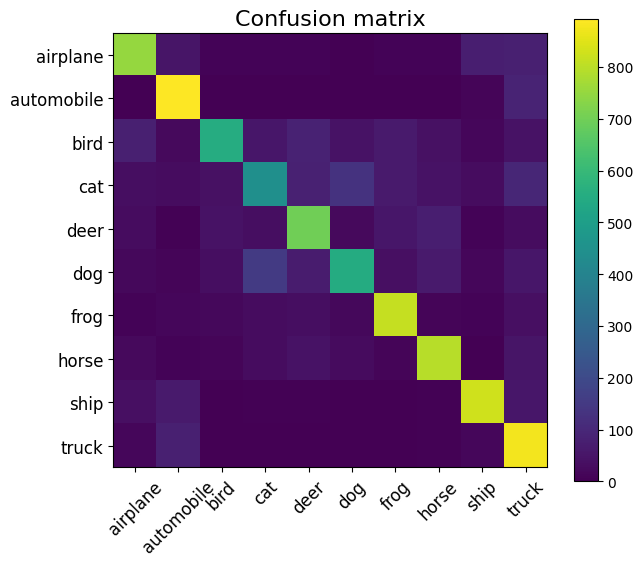

In [15]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [16]:
print("Test accuracy:", accuracy_score(y_test, y_predictions))

Test accuracy: 0.72


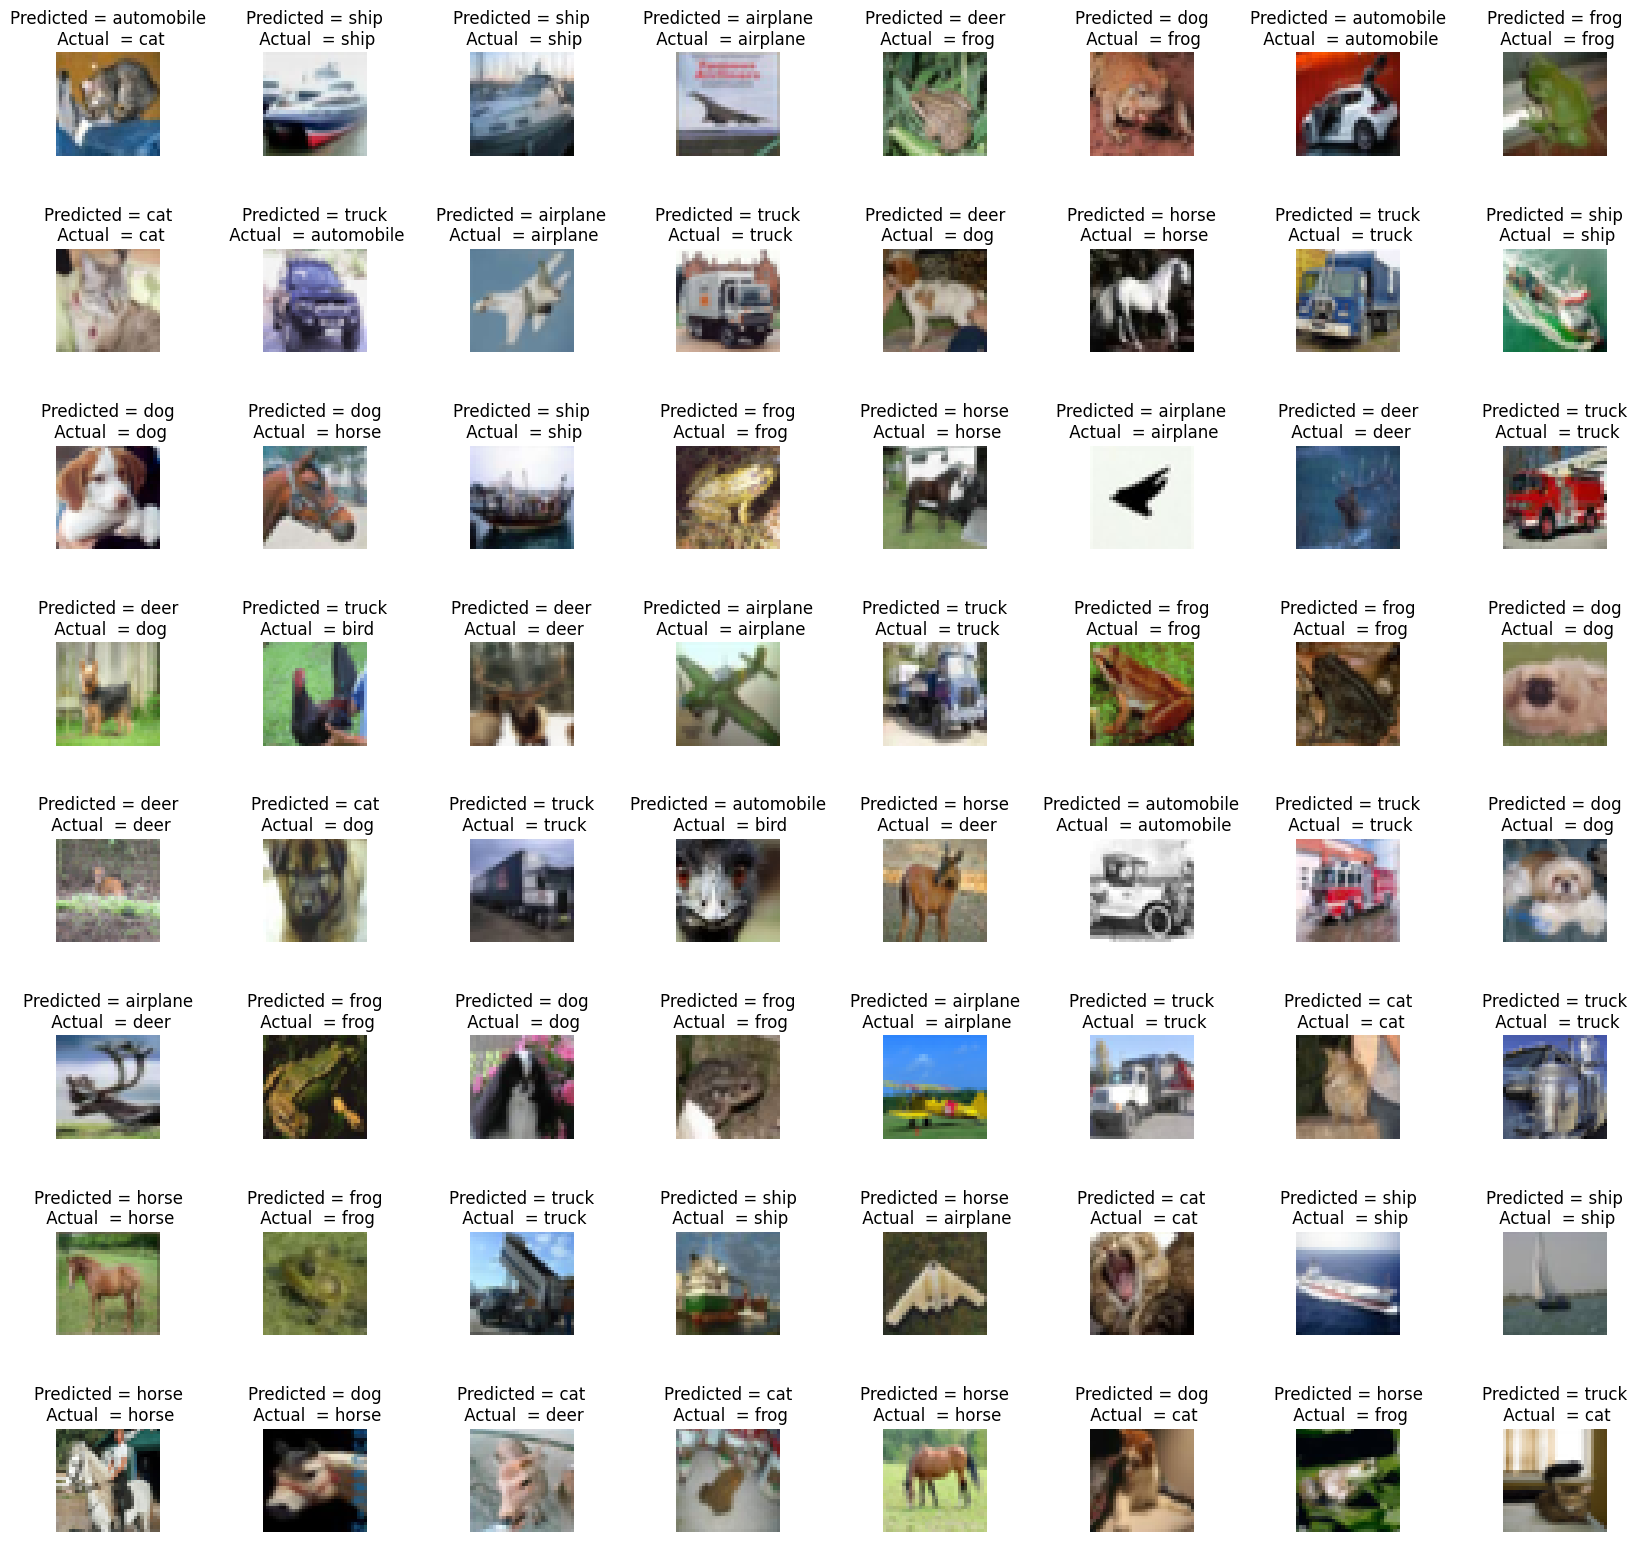

In [17]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

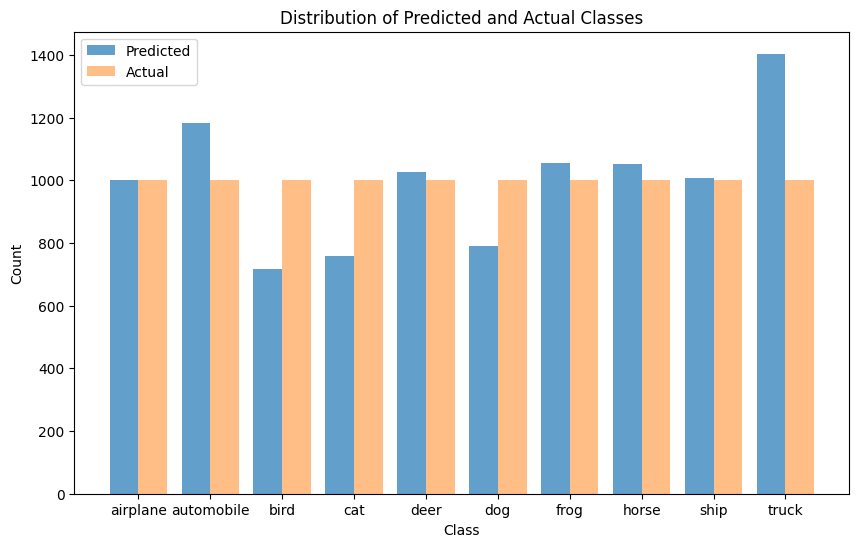

In [19]:
# Distribution of Predicted and Actual Classes
predicted_counts = np.bincount(y_predictions, minlength=10)
actual_counts = np.bincount(y_test, minlength=10)

plt.figure(figsize=(10, 6))
plt.bar(np.arange(10) - 0.2, predicted_counts, width=0.4, label='Predicted', alpha=0.7)
plt.bar(np.arange(10) + 0.2, actual_counts, width=0.4, label='Actual', alpha=0.5)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Predicted and Actual Classes')
plt.xticks(range(10), classes)
plt.legend()
plt.show()

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [23]:
#Define Alexnet Model
AlexNet = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), strides=(4, 4), input_shape=(32, 32, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(128, (5, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

AlexNet.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 8, 8, 64)          1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 4, 4, 64)          0         
 D)                                                              
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         204928    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 2, 2, 256)         295168    
                                                                 
 conv2d_7 (Conv2D)           (None, 2, 2, 256)        

In [24]:
history1 = AlexNet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

Epoch 1/100
1563/1563 [==============================] - 16s 8ms/step - loss: 1.8227 - accuracy: 0.2843 - val_loss: 1.6591 - val_accuracy: 0.4009
Epoch 2/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5007 - accuracy: 0.4462 - val_loss: 1.4012 - val_accuracy: 0.4987
Epoch 3/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3461 - accuracy: 0.5141 - val_loss: 1.2988 - val_accuracy: 0.5363
Epoch 4/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2609 - accuracy: 0.5479 - val_loss: 1.2745 - val_accuracy: 0.5430
Epoch 5/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1892 - accuracy: 0.5767 - val_loss: 1.2341 - val_accuracy: 0.5683
Epoch 6/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1277 - accuracy: 0.6004 - val_loss: 1.2742 - val_accuracy: 0.5633
Epoch 7/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0729 - accuracy: 0.6201 - val_loss: 1.2178 - 

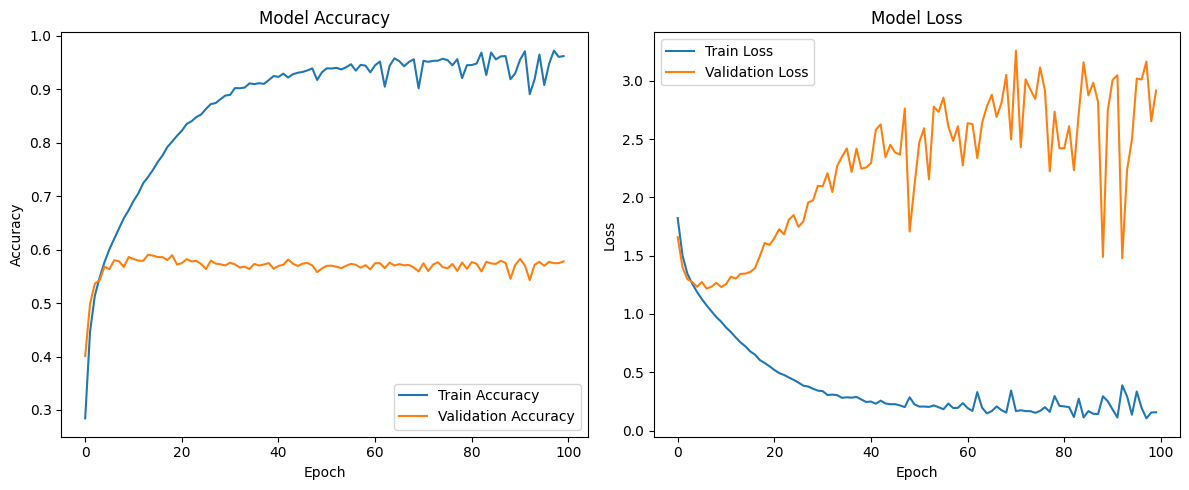

In [26]:
plt.figure(figsize=(12, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [27]:
y_predictions1 = AlexNet.predict(x_test)
y_predictions1.reshape(-1,)
y_predictions1= np.argmax(y_predictions1, axis=1)

confusion_matrix(y_test, y_predictions1)

313/313 [==============================] - 1s 2ms/step


array([[674,  22,  54,  25,  20,  24,  15,  30,  78,  58],
       [ 30, 679,   9,  17,   6,  10,  13,  17,  31, 188],
       [ 69,   8, 433,  66, 129, 115,  76,  63,  20,  21],
       [ 24,  17,  73, 341,  83, 255,  87,  57,  31,  32],
       [ 34,   3, 122,  54, 501,  75,  86,  98,  20,   7],
       [ 21,   4,  71, 142,  71, 542,  42,  80,   9,  18],
       [  8,  15,  63,  73,  84,  58, 638,  29,   8,  24],
       [ 20,   6,  59,  45,  94, 108,  14, 618,   5,  31],
       [117,  52,  18,  18,  19,  17,   9,  15, 687,  48],
       [ 58, 135,  17,  21,  11,  16,  16,  25,  34, 667]])

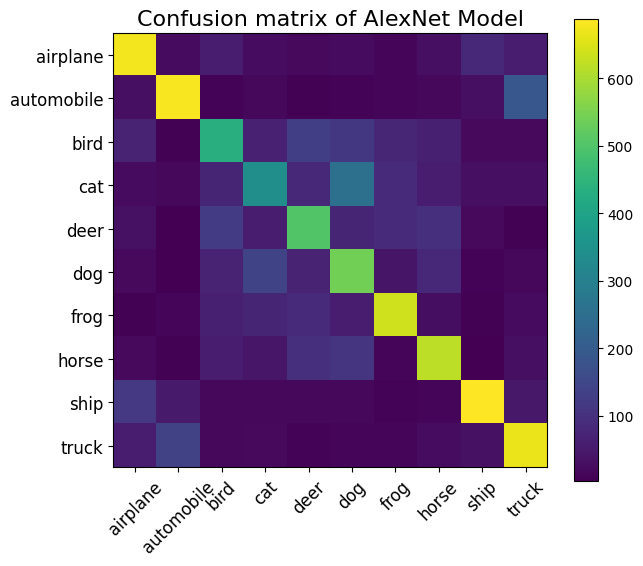

In [28]:
# confusion matrix and accuracy
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix of AlexNet Model', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions1))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [30]:
print("Test accuracy by AlexNet:", accuracy_score(y_test, y_predictions))

Test accuracy by AlexNet: 0.72


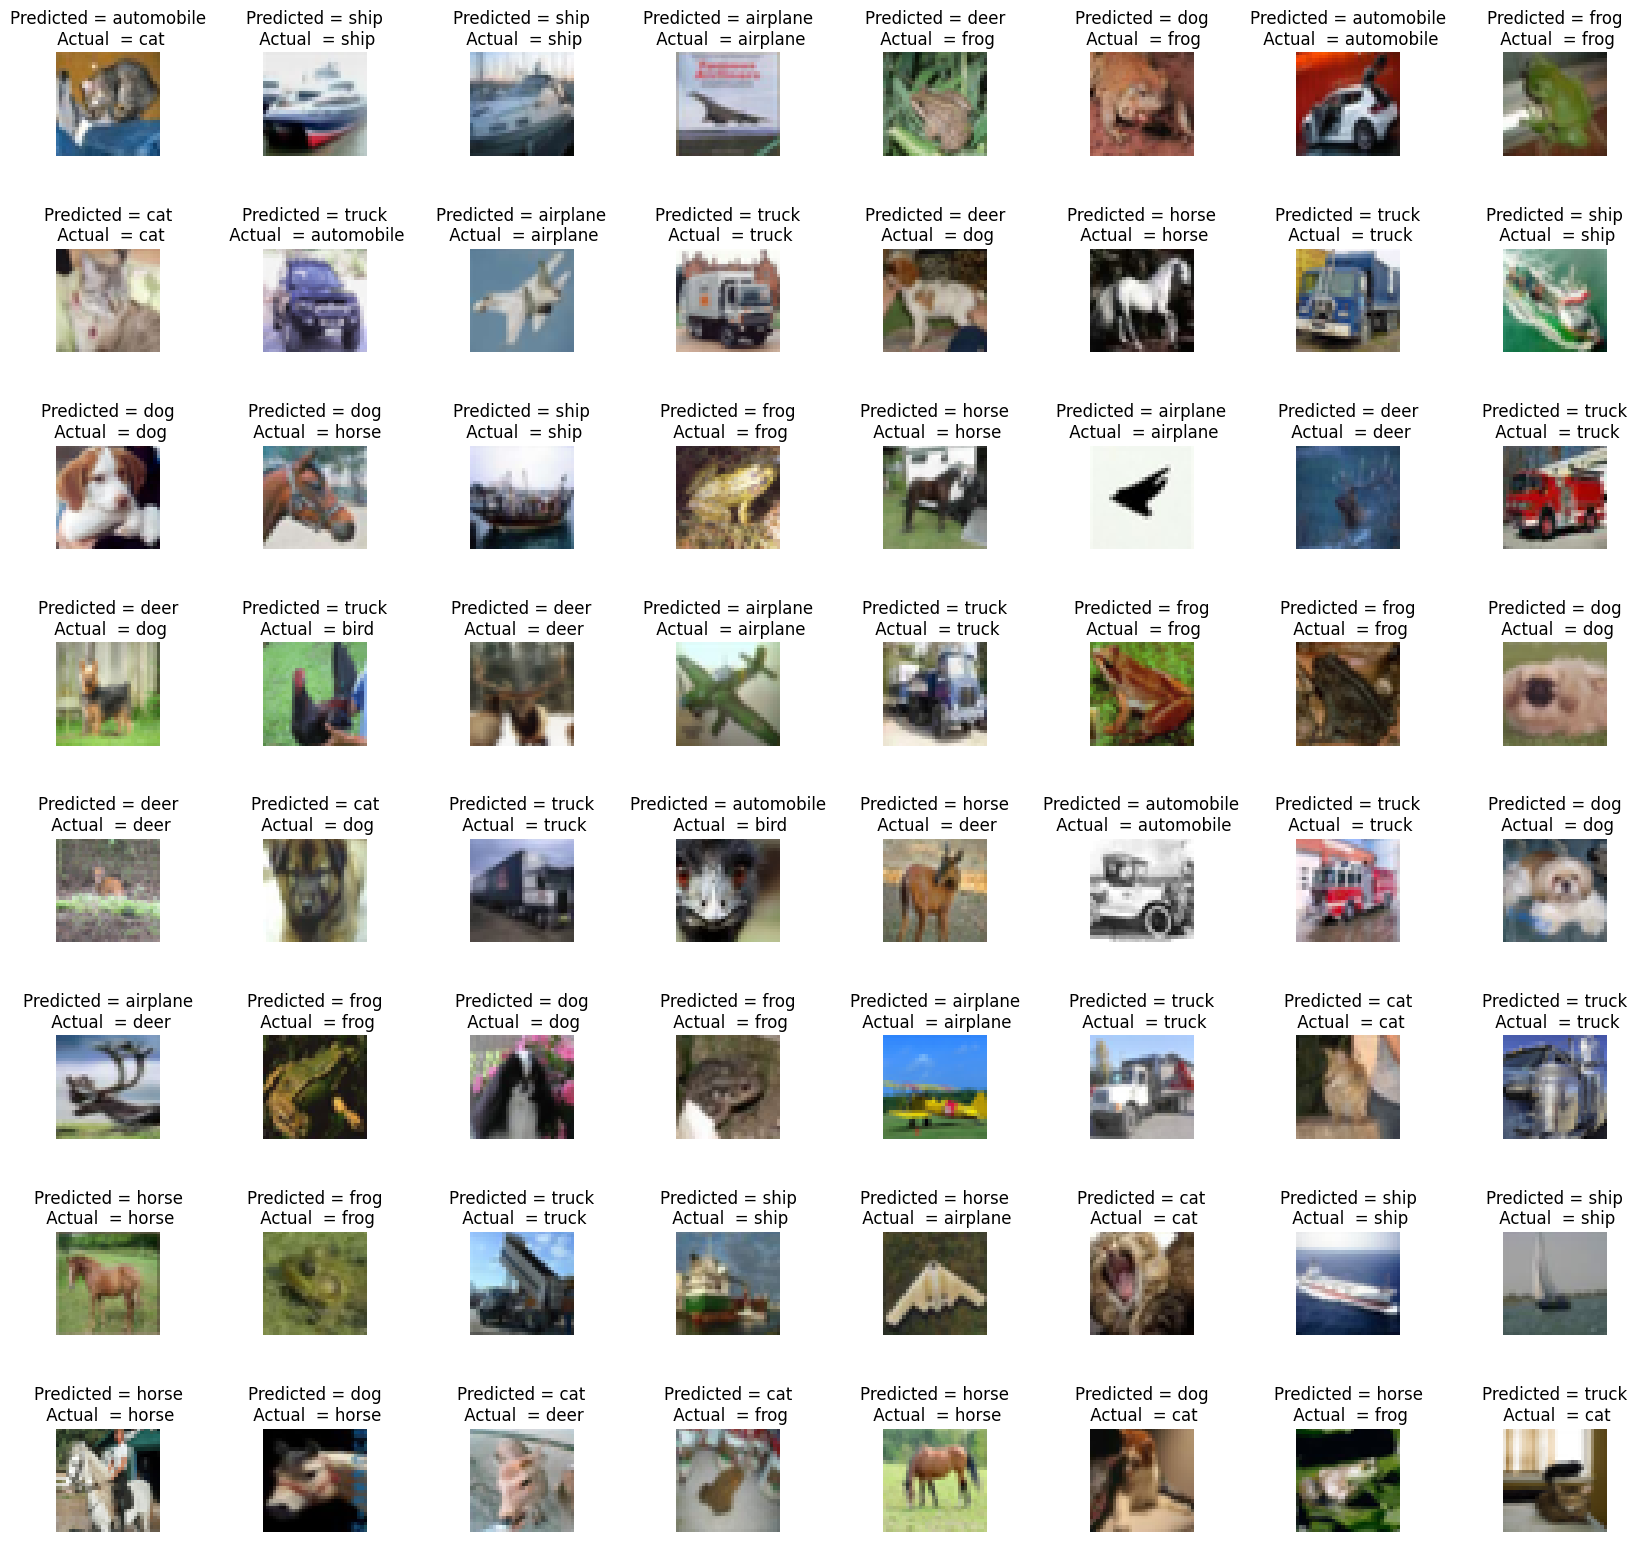

In [31]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [4]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_predictions1, output_dict=True)
class_accuracy = [report[str(i)]['precision'] for i in range(10)]  # Using precision as a proxy for per-class accuracy

plt.figure(figsize=(12, 6))
plt.bar(range(10), class_accuracy, color='skyblue')
plt.xticks(range(10), classes, rotation=45)
plt.title('Class-wise Accuracy')
plt.xlabel('Class')
plt.ylabel('Accuracy')


NameError: name 'y_test' is not defined